<h2>Task &#35 1 Prediction using Supervised ML </h2>
<b>Author : Mayank Bhatt<br/>
Problem Statement:</b><br/>
* Predict the percentage of a student based on the no. of study hours<br/>
* What will be the predicted score if a student studies for 9.25 hrs/day

In [1]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

student_data=pd.read_csv("http://bit.ly/w-data")

<h4>Data loading completed</h4>

In [2]:
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h4>Description of the data</h4>

In [3]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h4>Plotting the hours of study and scores of students on a graph so as to find out the relation between them.</h4>

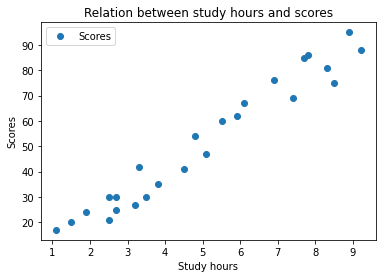

In [4]:
student_data.plot(x='Hours',y='Scores',style='o')
plt.title('Relation between study hours and scores')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.show()

<h4>As we can see in the graph that both features have a linear relation so I will apply Linear Regression model on this data</h4>

<h4>Preparing the data for splitting it into training dataset and test dataset</h4>

In [5]:
X=student_data.iloc[:, :-1].values
y=student_data.iloc[:,-1].values
X.shape,y.shape

((25, 1), (25,))

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=0)
X_train.shape,y_train.shape

((20, 1), (20,))

<h4>Now the data is split into training and test datasets.</h4>

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

<h4>Importing Linear Regression model from sklearn and fitting it on training data</h4>

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

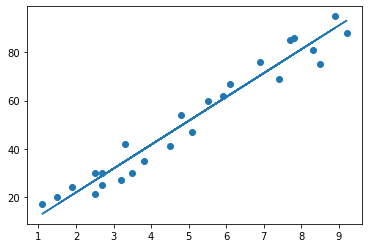

In [9]:
line=model.coef_*X+model.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

<h4>Applying the model on the test data to do predictions.</h4> 

In [10]:
pred=model.predict(X_test).astype(int)

In [11]:
#Comparing actual vs predicted scores
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

,Actual,Predicted
0,20,16
1,27,33
2,69,75
3,30,26
4,62,60


<h4>Predicting score if student studies for 9.25 hours.</h4>

In [12]:
hours=9.25
own_pred=model.predict([[hours]]).astype(int)
pd.DataFrame({'Hours':hours,'Predicted score':own_pred})

,Hours,Predicted score
0,9.25,93


<h4>Finding the mean absolute error between the predicted score and actual data</h4>

In [13]:
from sklearn import metrics
print("Mean absolute error",metrics.mean_absolute_error(y_test,pred))

Mean absolute error 4.4
